## Logistic regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
log = LogisticRegression(penalty = 'none')

In [ ]:
df = pd.read_pickle('Train_Test_Data_Airport_Flight_Delays.pkl')
df

,index,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,CARRIER_NAME_INT,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,...,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,DEP_DEL15
0,843141,2,7,2,4,15,14,4769,819756,13382999,...,0.000099,15,41.785,-87.752,0.02,0.0,0.0,50.0,24.38,1
1,5398935,10,6,4,2,8,14,6890,819756,13382999,...,0.000099,19,41.785,-87.752,2.18,0.0,0.0,48.0,12.53,0
2,4661064,9,3,4,1,13,14,6386,819756,13382999,...,0.000099,4,41.785,-87.752,0.00,0.0,0.0,69.0,8.95,0
3,2018389,4,6,7,2,16,14,6362,819756,13382999,...,0.000099,2,41.785,-87.752,0.00,0.0,0.0,66.0,4.92,1
4,916026,2,7,3,3,12,14,4769,819756,13382999,...,0.000099,12,41.785,-87.752,0.20,3.1,0.0,27.0,11.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56347,2018435,4,6,3,4,14,14,6362,819756,13382999,...,0.000099,15,41.785,-87.752,0.00,0.0,0.0,66.0,4.92,0
56348,4835097,9,4,2,1,16,14,6386,819756,13382999,...,0.000099,5,41.785,-87.752,0.00,0.0,0.0,74.0,4.92,0
56349,822265,2,2,2,2,18,14,4769,819756,13382999,...,0.000099,9,41.785,-87.752,0.00,0.0,3.1,35.0,4.70,0
56350,4617665,9,7,3,2,11,14,6386,819756,13382999,...,0.000099,15,41.785,-87.752,0.34,0.0,0.0,73.0,4.47,0


In [ ]:
print(df.columns.tolist())

['index', 'MONTH', 'DAY_OF_WEEK', 'DISTANCE_GROUP', 'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'CARRIER_NAME_INT', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'LATITUDE', 'LONGITUDE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND', 'DEP_DEL15']


In [ ]:
X = df[[ 'MONTH', 'DAY_OF_WEEK', 'DISTANCE_GROUP', 'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'CARRIER_NAME_INT', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']]
y = df['DEP_DEL15'] == 1

## k-fold cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 22)

In [ ]:
from sklearn.model_selection import cross_validate
pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty = 'none'))
cv_results = cross_validate(pipe, X, y, scoring = ['balanced_accuracy','precision', 'recall', 'f1'], cv = cv)

In [ ]:
pd.DataFrame(cv_results)

,fit_time,score_time,test_balanced_accuracy,test_precision,test_recall,test_f1
0,4.087252,0.033385,0.522884,0.525907,0.067870,0.120225
1,0.453594,0.029301,0.525448,0.555844,0.071548,0.126777
2,0.125348,0.016348,0.523324,0.528205,0.068873,0.121857
3,0.158802,0.027002,0.523872,0.530303,0.070211,0.124004
4,0.122919,0.018787,0.528084,0.587467,0.075251,0.133412


In [ ]:
pd.DataFrame(cv_results).mean()

fit_time                  0.989583
score_time                0.024965
test_balanced_accuracy    0.524723
test_precision            0.545545
test_recall               0.070751
test_f1                   0.125255
dtype: float64

## train-test split

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y,random_state=2022)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [ ]:
from collections import Counter

In [ ]:
Counter(y_resampled)

Counter({True: 28978, False: 28978})

In [ ]:
pipe.fit(X_resampled, y_resampled)

y_pred = pipe.predict(X_test)

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

### 1)  accuracy

In [ ]:
accuracy=accuracy_score(y_test, y_pred)
print("(1) accrucacy score is",accuracy)

(1) accrucacy score is 0.6149296107890689


### 2)  balanced accuracy

In [ ]:
bas=balanced_accuracy_score(y_test, y_pred)
print("(2) balanced accuracy score is",bas)

(2) balanced accuracy score is 0.6170959320211099


### 3)  precision

In [ ]:
pre=precision_score(y_test, y_pred)
print("(3) precision score is",pre)

(3) precision score is 0.36687713759536966


### 4)  recall

In [ ]:
rec=recall_score(y_test, y_pred)
print("(4) recall score is",rec)

(4) recall score is 0.6217119928666964


### 5)  f1 score

In [ ]:
f1=f1_score(y_test, y_pred)
print("(5) f1 score is",f1)

(5) f1 score is 0.46144937127729985


### 6)  summary

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.37      0.62      0.46      4486
       False       0.82      0.61      0.70     12420

    accuracy                           0.61     16906
   macro avg       0.59      0.62      0.58     16906
weighted avg       0.70      0.61      0.64     16906



In [ ]:
## ROC curve

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay,roc_curve, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay,roc_curve, roc_auc_score,auc

In [ ]:
prediction = pipe.predict_proba(X_test)
prediction

array([[0.47409639, 0.52590361],
       [0.4417018 , 0.5582982 ],
       [0.53283287, 0.46716713],
       ...,
       [0.59493567, 0.40506433],
       [0.41485462, 0.58514538],
       [0.61950697, 0.38049303]])

0.6588136970054627


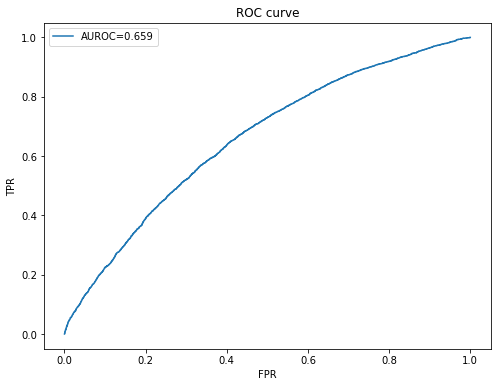

In [ ]:
print(roc_auc_score(y_test, prediction[:,1]))

fpr, tpr, _ = roc_curve(y_test, prediction[:,1])
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.clf()
plt.plot(fpr, tpr,label=f'AUROC={roc_auc:.3f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.title('ROC curve')
plt.legend()

plt.show()

### 7)  confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred, labels = [True, False])

array([[2789, 1697],
       [4813, 7607]])

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred, labels = [True, False], normalize = 'all')
conf_mat

array([[0.16497102, 0.10037856],
       [0.28469183, 0.44995859]])

[[2789 1697]
 [4813 7607]]


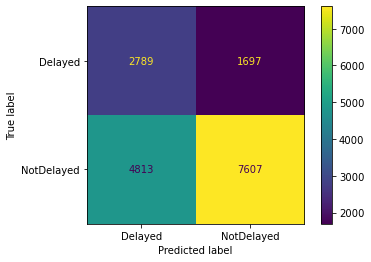

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = ['Delayed', 'NotDelayed']
cm = confusion_matrix(y_test,y_pred ,labels=[1,0])
print(cm)
cmd = ConfusionMatrixDisplay(cm,display_labels=['Delayed','NotDelayed'])
cmd.plot()

## Expected value

In [ ]:
import numpy as np
cost_benefit_matrix=np.array([[-50,-500],[-100,100]])
cost_benefit_matrix

array([[ -50, -500],
       [-100,  100]])

In [ ]:
value_expected=(conf_mat * cost_benefit_matrix).sum()
value_expected

-41.91115580267361

[[2789 1697]
 [4813 7607]]


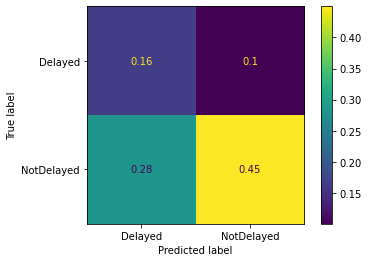

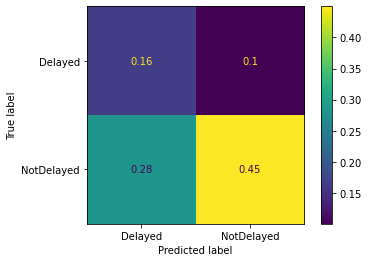

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = ['Delayed', 'NotDelayed']
cm = confusion_matrix(y_test,y_pred ,labels=[1,0])
print(cm)
cmd = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,labels=[1,0],display_labels=['Delayed','NotDelayed'],normalize='all')
cmd.plot()